# <center> Presonalized Book Search <center>
## <center> Machine Learning Project <center>

### <center>Suki Yang<center>
### <center>Aug 6th 2022<center>

_You’re driving the team to develop an innovative book search engine. Assume that you have an inclusive catalogue containing information about 10k English books. Over time you’ve also collected users' interactions with books including 'marked' and 'ratings'._

_Your goal is to provide users a personalized search experience for any type of book- hunting intent query. More formally, your goal is to provide code that takes as input a user id u and a query string q , and gives as output a ranked list of books
b1, b2, ... , bn. We expect your solution to have an information retrieval component._

In [1]:
# Import packages
%matplotlib inline

import pandas as pd
import numpy as np
import plotly as pl
import matplotlib.pyplot as plt

In [2]:
# Read data
# ratings is a dataframe containing users' ratings for books
ratings = pd.read_csv('ratings.csv')

# to_read is a dataframe containing users' marked books to read.
to_read = pd.read_csv('to_read.csv')

# books is a dataframe containing metadata for each book (goodreads IDs, authors, title, average rating, etc.).
books = pd.read_csv('books.csv')

# tags is a dataframe that translates tag IDs to names.
tags = pd.read_csv('tags.csv')

# book_tags is a dataframe contains tags/shelves/genres assigned by users to books. Tags in this file are represented by their IDs. 
book_tags = pd.read_csv('book_tags.csv')

# df_list is an assembly of DataFrames
df_list = [ratings, to_read, books, tags, book_tags]
df_list_str = ['ratings', 'to_read', 'books', 'tags', 'book_tags']

In [15]:
# Get columns of dataframes
def get_column(df):
    return df.columns.to_list()

print('#################################################################')
print('ratings columns: ', get_column(ratings))
print('to_read columns: ', get_column(to_read))
print('books columns: ', get_column(books))
print('tags columns: ', get_column(tags))
print('book_tags columns: ', get_column(book_tags))
print('#################################################################')

#################################################################
ratings columns:  ['user_id', 'book_id', 'rating']
to_read columns:  ['user_id', 'book_id']
books columns:  ['book_id', 'goodreads_book_id', 'best_book_id', 'work_id', 'books_count', 'isbn', 'isbn13', 'authors', 'original_publication_year', 'original_title', 'title', 'language_code', 'average_rating', 'ratings_count', 'work_ratings_count', 'work_text_reviews_count', 'ratings_1', 'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5', 'image_url', 'small_image_url']
tags columns:  ['tag_id', 'tag_name']
book_tags columns:  ['goodreads_book_id', 'tag_id', 'count']
#################################################################


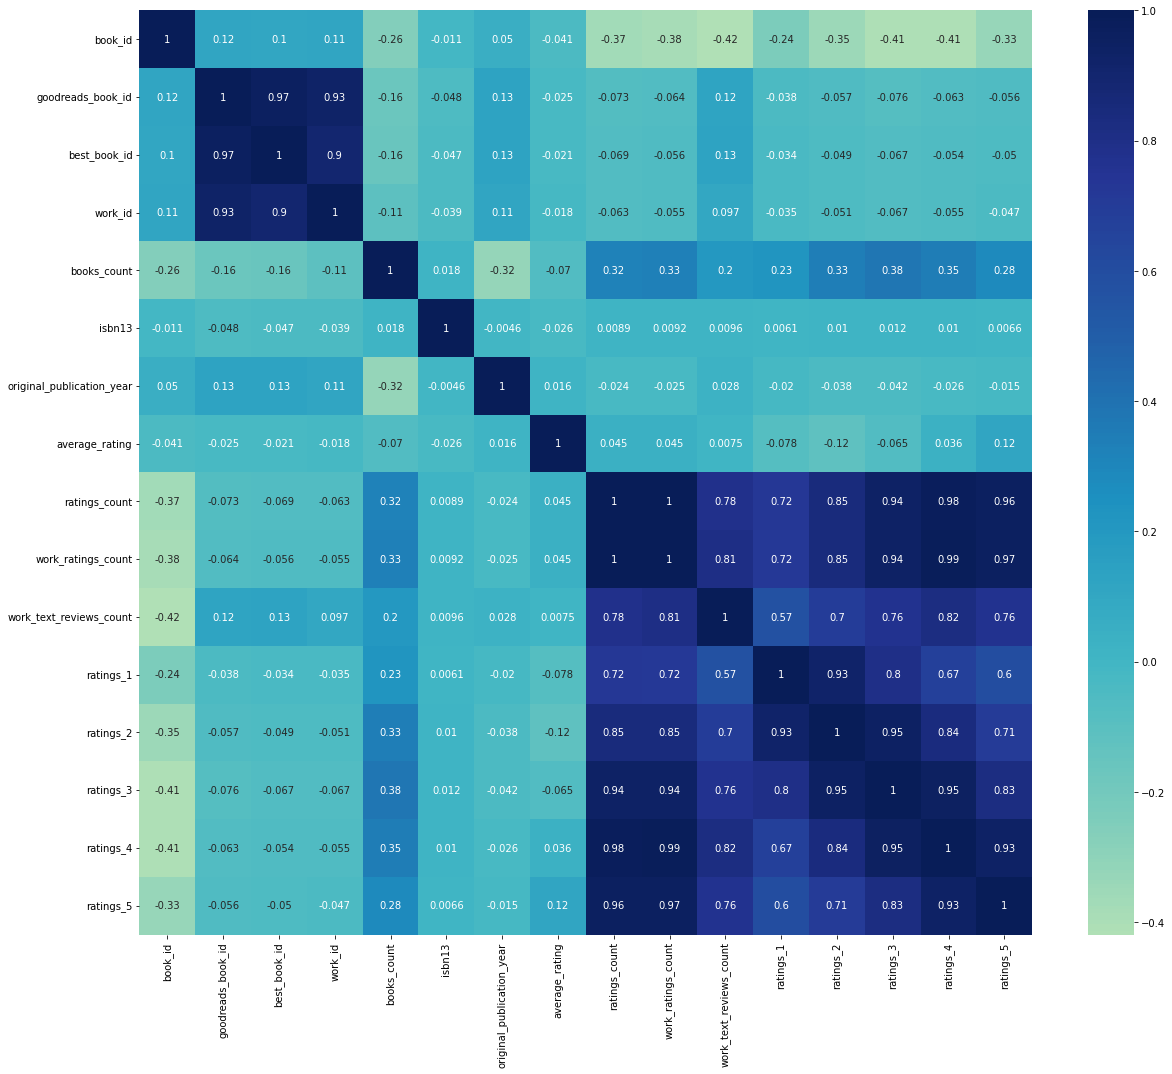

In [4]:
# Draw graph to visualize correlation, gives an idea of features's correlation in the books dataframe
import seaborn as sns
df_corr = books.corr()
f, ax = plt.subplots(figsize=(20, 17))
ax = sns.heatmap(df_corr, center=0, annot=True, cmap='YlGnBu')

In [5]:
#Display all the tables
for i in range(0,5):
    print('##################################################')
    display(df_list_str[i])
    display(df_list[i].head(6))

##################################################


'ratings'

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3
5,2,26,4


##################################################


'to_read'

,user_id,book_id
0,9,8
1,15,398
2,15,275
3,37,7173
4,34,380
5,34,483


##################################################


'books'

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...
5,6,11870085,11870085,16827462,226,525478817,9.780525e+12,John Green,2012.0,The Fault in Our Stars,...,2346404,2478609,140739,47994,92723,327550,698471,1311871,https://images.gr-assets.com/books/1360206420m...,https://images.gr-assets.com/books/1360206420s...


##################################################


'tags'

,tag_id,tag_name
0,0,-
1,1,--1-
2,2,--10-
3,3,--12-
4,4,--122-
5,5,--166-


##################################################


'book_tags'

,goodreads_book_id,tag_id,count
0,1,30574,167697
1,1,11305,37174
2,1,11557,34173
3,1,8717,12986
4,1,33114,12716
5,1,11743,9954


# Modeling
## Part1: WordBag
- WordBag solves the problem of searching key words. 
- Based on the key words, it will return results by calculating similarity and extracting features.

## Part2: Collaborative Filtering
- CF solves the problem of personalized results. 
- In the end, we combine the two models and return a final recommended list.

# WordBag

- Gensim is a Python library for topic modelling, document indexing and similarity retrieval with large corpora. 
- tfidf is a feature extraction model.

In [6]:
from gensim import corpora, models, similarities

# book_title
strings = [i.split() for i in (books['original_title'].astype(str).map(lambda x:x+' ')+ books['authors'].astype(str))]

def build_tfidf(strings:list):
    """
    build a word of bag tfidf model
    """
    # book title list
    Corp = strings.copy()
    print("building dictionary for tfidf model...")
    dictionary = corpora.Dictionary(Corp)
    corpus = [dictionary.doc2bow(text) for text in Corp]
    
    # build a word of bag model
    tfidf = models.TfidfModel(corpus)
    corpus_tfidf = tfidf[corpus]
    return tfidf, corpus_tfidf, dictionary

def get_similarity(tfidf,corpus_tfidf,dictionary,query):
    """
    input the query string, return the similarities by index
    """
    print(f" - tfidf searching query: {query}")
    # input the query string
    vec_bow = dictionary.doc2bow(query.split())
    vec_tfidf = tfidf[vec_bow]
    # caculate the similarity
    index = similarities.MatrixSimilarity(corpus_tfidf)
    sims = index[vec_tfidf]
    # all similarities
    similarity_list = list(sims)
    return similarity_list

tfidf, corpus_tfidf, dictionary = build_tfidf(strings)

building dictionary for tfidf model...


Here's an **example** for the similarity model: <br />
query = "Harry Potter and the Philosopher's Stone"  <br />
get_similarity(tfidf, corpus_tfidf, dictionary, query)<br />

# Collaborative Filtering

- critics dic looks like {user:{book:rating}} dict
critics = {'Lisa Rose': {'Lady in the Water': 2.5, 'Snake on a Plane': 3.5,
                          'Just My Luck': 3.0, 'Superman Returns': 3.5, 'You, Me and Dupree': 2.5,
                          'The Night Listener': 3.0},

            'Gene Seymour': {'Lady in the Water': 3.0, 'Snake on a Plane': 3.5,
                           'Just My Luck': 1.5, 'Superman Returns': 5.0, 'The Night Listener': 3.0,
                           'You, Me and Dupree': 3.5, }}

preprocessing data, build user rating dictionary

In [8]:
critics = {}
# critics is a dictionary storing the information of user's ratings of books, aggregated by different users.
print("building user rating dictionary for collaborative filtering, please wait...")
for user_id in ratings['user_id'].unique():
    rating_user = ratings[ratings['user_id']==user_id]
    critics[user_id] = {i:j for i,j in zip(rating_user['book_id'],rating_user['rating'])}

building user rating dictionary for collaborative filtering, please wait...


In [9]:
from math import sqrt
# caculate similarity value between two users
def similarity(tagert_user,compare_user):
    sum = 0
    for item in critics[tagert_user]:
        if item in critics[compare_user]:
            sum += pow(critics[tagert_user][item] - critics[compare_user][item], 2)
    return 1/(1+sqrt(sum))

# Normalize
def normalized(user):
    recommend = {} 
    movieNum_dic = {} 
    for other_user in critics:
        movieNum = 0 
        scoreSum = 0 
        if other_user != user:
            for movie in critics[other_user]:
                movieNum += 1
                scoreSum += critics[other_user][movie]
            averageScore = scoreSum/movieNum 
            for movie in critics[other_user]:
                critics[other_user][movie] = critics[other_user][movie]/averageScore
                if movie not in critics[user] and movie not in recommend:
                    recommend[movie] = 0
                    movieNum_dic[movie] = 0
    return recommend, movieNum_dic

# run recommend
def to_recommend(user):
    print(f" - collaborative filtering searching user: {user}")
    recommend, movieNum_dic = normalized(user)
    for other_user in critics:
        if other_user != user:
            for movie in critics[other_user]:
                if movie in recommend:
                    recommend[movie] += similarity(user,other_user) * critics[other_user][movie]
                    movieNum_dic[movie] += 1
    for movie in recommend:
        recommend[movie] /= movieNum_dic[movie]
    return recommend

In [16]:
# example for collaborative filtering, recommend user_id: 100
recommend = to_recommend(100)

 - collaborative filtering searching user: 100


In [11]:
# The main function combines CF model and TFIDF model
def main(user_id,query, weight_cf_tfidf = (0.5,0.5),top_num=20):
    """
    define a main function, this receives the user_id and user query, it returns the top 20 rankded book list
    weight_cf_tfidf is the weight that distribute to the similarity of two algorithms
    """
    print("searching, please wait...")
    # tfidf caculates similarity
    tfidf_sim_list = get_similarity(tfidf,corpus_tfidf,dictionary,query)
    tfidf_sim = pd.DataFrame({'book_id':books['book_id'],'tfidf_similarity':tfidf_sim_list})
    
    # cf caculates similarity
    cf_sim_dic = to_recommend(user_id)
    cf_sim = pd.DataFrame(cf_sim_dic.items(),columns=['book_id','cf_similarity'])
    
    # merge the two results
    result  = pd.merge(tfidf_sim,cf_sim,on='book_id',how='inner')
    
    # caculate final similarity
    result['similarity'] = result['cf_similarity']*weight_cf_tfidf[0] + result['tfidf_similarity']*weight_cf_tfidf[1]
    
    # rank the top_num
    result = result.sort_values(by=['similarity'],ascending=False).reset_index(drop=True).head(top_num)
    
    # find the book title and autors
    result = pd.merge(result,books[['book_id','original_title','authors']],on='book_id',how='left')
    print('finished!')
    
    return result

In [12]:
books

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,7130616,7130616,7392860,19,441019455,9.780441e+12,Ilona Andrews,2010.0,Bayou Moon,...,17204,18856,1180,105,575,3538,7860,6778,https://images.gr-assets.com/books/1307445460m...,https://images.gr-assets.com/books/1307445460s...
9996,9997,208324,208324,1084709,19,067973371X,9.780680e+12,Robert A. Caro,1990.0,Means of Ascent,...,12582,12952,395,303,551,1737,3389,6972,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
9997,9998,77431,77431,2393986,60,039330762X,9.780393e+12,Patrick O'Brian,1977.0,The Mauritius Command,...,9421,10733,374,11,111,1191,4240,5180,https://images.gr-assets.com/books/1455373531m...,https://images.gr-assets.com/books/1455373531s...
9998,9999,8565083,8565083,13433613,7,61711527,9.780062e+12,Peggy Orenstein,2011.0,Cinderella Ate My Daughter: Dispatches from th...,...,11279,11994,1988,275,1002,3765,4577,2375,https://images.gr-assets.com/books/1279214118m...,https://images.gr-assets.com/books/1279214118s...


# Testing

In [13]:
# example
# input user_id and search query, the algorithm will recommend list of books
user_id = 100
query = 'Harry Potter'
# or input below
# query = input("please input:")
result = main(user_id,query)

searching, please wait...
 - tfidf searching query: Harry Potter
 - collaborative filtering searching user: 100
finished!


In [14]:
# show the ranked book list of top 20 books for user 100
result

,book_id,tfidf_similarity,cf_similarity,similarity,original_title,authors
0,8892,0.0,0.894663,0.447332,Wait for It,Mariana Zapata
1,6100,0.0,0.883526,0.441763,Wethering the Storm,Samantha Towle
2,9580,0.0,0.883116,0.441558,NaN,Vi Keeland
3,9535,0.0,0.877676,0.438838,NaN,Aurora Rose Reynolds
4,8089,0.0,0.875449,0.437724,NaN,Aurora Rose Reynolds
5,9099,0.0,0.871711,0.435855,NaN,Aurora Rose Reynolds
6,9712,0.0,0.866905,0.433453,Magic Binds,Ilona Andrews
7,5272,0.0,0.860206,0.430103,Until November,Aurora Rose Reynolds
8,7196,0.0,0.859212,0.429606,The Baller: A Down and Dirty Football Novel,Vi Keeland
9,7847,0.0,0.859137,0.429568,Bad for You,Abbi Glines
